In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("Fixed_news_dataset.csv", encoding='utf-8')
df.head()

,Unnamed: 0.1,Unnamed: 0,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,0,0,218270,NaN,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế thôn...",3,0,docbao.vn,"Tên cướp tiệm vàng Huế đại uý công an, công tá...",Pháp luật,https://docbao.vn/phap-luat/ten-cuop-tiem-vang...,2022-08-01 09:09:22.817308
1,1,1,218269,doãn hằng,"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",1,0,vtc.vn,"Bỏ mạng 5G, Nga tiến thẳng 4G 6G",Sức khỏe - Đời sống,https://vtc.vn/bo-qua-mang-5g-nga-tien-thang-t...,2022-08-01 09:09:21.181469
2,2,2,218268,NaN,"Kết thi nghiệp THPT 2022 trung bình môn toán, ...",3,0,thanhnien.vn,"Địa phương đứng đầu tổng 3 môn văn, toán, ngoạ...",Giáo dục,https://thanhnien.vn/dia-phuong-nao-dung-dau-c...,2022-08-01 09:09:15.311901
3,3,3,218267,NaN,Thống đốc Kentucky Andy Beshear hôm 31/7 đợt m...,1,0,vnexpress,Người chết mưa lũ 'nghìn một' Mỹ 28,Thế giới,https://vnexpress.net/nguoi-chet-trong-mua-lu-...,2022-08-01 09:09:02.211498
4,4,4,218266,mi lan,Vụ tai nạn giao thông liên hoàn phố đi Tam Bạc...,12,0,soha,"Hải Phòng: Hình ảnh xe ""điên"" tai nạn liên hoà...",Thời sự,https://soha.vn/hai-phong-hinh-anh-xe-dien-gay...,2022-08-01 09:09:01.601170


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184539 entries, 0 to 184538
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0.1   184539 non-null  int64 
 1   Unnamed: 0     184539 non-null  int64 
 2   id             184539 non-null  int64 
 3   author         110923 non-null  object
 4   content        161218 non-null  object
 5   picture_count  184539 non-null  int64 
 6   processed      184539 non-null  int64 
 7   source         184534 non-null  object
 8   title          184522 non-null  object
 9   topic          184539 non-null  object
 10  url            184539 non-null  object
 11  crawled_at     184125 non-null  object
dtypes: int64(5), object(7)
memory usage: 16.9+ MB


In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
id                   0
author           73616
content          23321
picture_count        0
processed            0
source               5
title               17
topic                0
url                  0
crawled_at         414
dtype: int64

In [53]:
null_content = df["content"].isnull()
null_title = df["title"].isnull()
delete_rows = df[null_content & null_title]
len(delete_rows)

16

In [54]:
df["topic"].value_counts()

topic
Văn hóa - Giải trí        32040
Sức khỏe - Đời sống       25578
Thể thao                  22549
Thế giới                  17386
Thời sự                   16974
Xã hội                    16630
Kinh doanh - Tài chính    11175
Pháp luật                 10807
Giáo dục                   8166
Kinh tế                    5581
Xe                         4496
Công nghệ                  4333
Chính trị                  4113
Bạn đọc                    1820
Bất động sản               1532
Quốc phòng                 1356
Pháp luật                   3
Name: count, dtype: int64

# Data Clean


In [55]:
import re
import unicodedata

df = df.drop(columns=[
    "Unnamed: 0.1",
    "Unnamed: 0",
    "id",
    "author",
    "picture_count",
    "processed",
    "source",
    "url",
    "crawled_at"
])

df.head()

,content,title,topic
0,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế thôn...","Tên cướp tiệm vàng Huế đại uý công an, công tá...",Pháp luật
1,"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...","Bỏ mạng 5G, Nga tiến thẳng 4G 6G",Sức khỏe - Đời sống
2,"Kết thi nghiệp THPT 2022 trung bình môn toán, ...","Địa phương đứng đầu tổng 3 môn văn, toán, ngoạ...",Giáo dục
3,Thống đốc Kentucky Andy Beshear hôm 31/7 đợt m...,Người chết mưa lũ 'nghìn một' Mỹ 28,Thế giới
4,Vụ tai nạn giao thông liên hoàn phố đi Tam Bạc...,"Hải Phòng: Hình ảnh xe ""điên"" tai nạn liên hoà...",Thời sự


In [56]:
df = df.drop(delete_rows.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184523 entries, 0 to 184538
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  161218 non-null  object
 1   title    184522 non-null  object
 2   topic    184523 non-null  object
dtypes: object(3)
memory usage: 5.6+ MB


In [57]:
df["text"] = df["title"] + " " + df["content"]
df = df.drop(columns=["title", "content"])
df.head()

,topic,text
0,Pháp luật,"Tên cướp tiệm vàng Huế đại uý công an, công tá..."
1,Sức khỏe - Đời sống,"Bỏ mạng 5G, Nga tiến thẳng 4G 6G Gần đây, Thứ ..."
2,Giáo dục,"Địa phương đứng đầu tổng 3 môn văn, toán, ngoạ..."
3,Thế giới,Người chết mưa lũ 'nghìn một' Mỹ 28 Thống đốc ...
4,Thời sự,"Hải Phòng: Hình ảnh xe ""điên"" tai nạn liên hoà..."


In [58]:
df = df.applymap(lambda x: unicodedata.normalize('NFC',x)if isinstance(x, str) else x)
df["topic"].value_counts()

C:\Users\Viet Hung\AppData\Local\Temp\ipykernel_7052\2301317726.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: unicodedata.normalize('NFC',x)if isinstance(x, str) else x)


topic
Văn hóa - Giải trí        32024
Sức khỏe - Đời sống       25578
Thể thao                  22549
Thế giới                  17386
Thời sự                   16974
Xã hội                    16630
Kinh doanh - Tài chính    11175
Pháp luật                 10810
Giáo dục                   8166
Kinh tế                    5581
Xe                         4496
Công nghệ                  4333
Chính trị                  4113
Bạn đọc                    1820
Bất động sản               1532
Quốc phòng                 1356
Name: count, dtype: int64

In [59]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"[^0-9a-zàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễ"
                  r"ìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữ"
                  r"ỳýỵỷỹđ\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text
df["clean_text"] = df["text"].apply(clean_text)

# 2. Bỏ NaN và chuỗi rỗng
df = df[df["clean_text"].notna() & (df["clean_text"].str.strip() != "")].copy()

# 3. Đảm bảo kiểu str
df["clean_text"] = df["clean_text"].astype(str)
df.drop(columns=["text"], inplace=True)
#df.to_csv("Cleaned_news_dataset.csv", index=False, encoding='utf-8')

Explore Data Analysis

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [61]:
data = pd.read_csv("Data_tokenized.csv", encoding='utf-8')
data.head()

,topic,tokens
0,Pháp luật,tên cướp tiệm vàng huế đại_úy công_an công_tác...
1,Sức khỏe - Đời sống,bỏ mạng 5 g nga tiến thẳng 4 g 6 g gần đây thứ...
2,Giáo dục,địa_phương đứng đầu tổng 3 môn văn_toán ngoại_...
3,Thế giới,người chết mưa_lũ nghìn một mỹ 28 thống_đốc ke...
4,Thời sự,hải_phòng hình_ảnh xe điên tai_nạn liên_hoàn p...


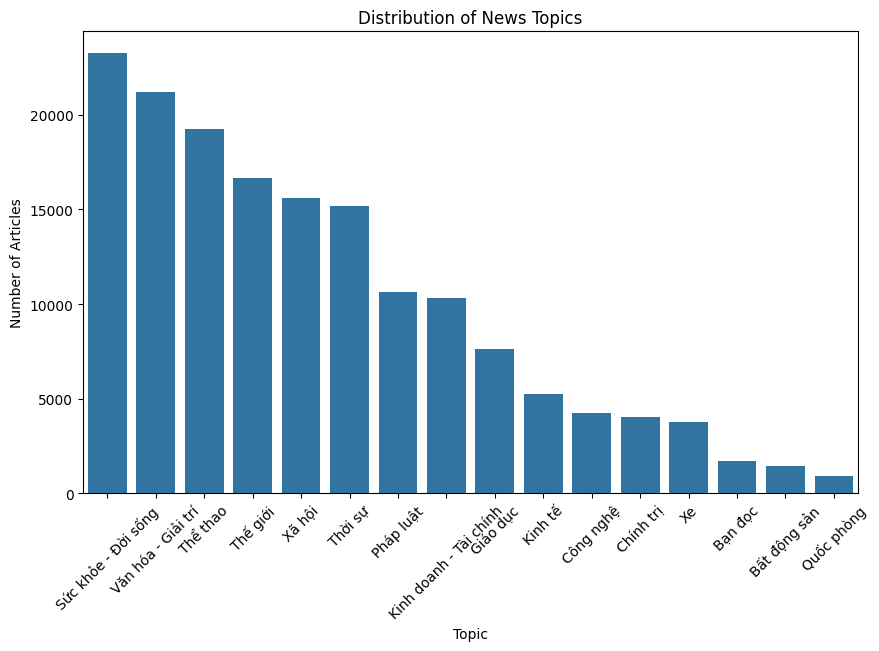

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='topic', order=data['topic'].value_counts().index)
plt.title('Distribution of News Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# DataPreProcessing

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
data["topic"].value_counts()

topic
Sức khỏe - Đời sống       23241
Văn hóa - Giải trí        21224
Thể thao                  19263
Thế giới                  16682
Xã hội                    15580
Thời sự                   15205
Pháp luật                 10650
Kinh doanh - Tài chính    10313
Giáo dục                   7631
Kinh tế                    5255
Công nghệ                  4248
Chính trị                  4032
Xe                         3795
Bạn đọc                    1715
Bất động sản               1457
Quốc phòng                  925
Name: count, dtype: int64

In [64]:
merge1 = {
    "Quốc phòng": "Chính trị",
    "Bất động sản": "Kinh doanh - Tài chính",
    "Bạn đọc": "Xã hội",
    "Kinh tế": "Kinh doanh - Tài chính",
    "Thời sự": "Xã hội"
}

data["topic"] = data["topic"].replace(merge1)

# Sau đó gộp “Chính trị” vào “Thế giới”
data["topic"] = data["topic"].replace({"Chính trị": "Thế giới"})

data["topic"].value_counts()


topic
Xã hội                    32500
Sức khỏe - Đời sống       23241
Thế giới                  21639
Văn hóa - Giải trí        21224
Thể thao                  19263
Kinh doanh - Tài chính    17025
Pháp luật                 10650
Giáo dục                   7631
Công nghệ                  4248
Xe                         3795
Name: count, dtype: int64

In [65]:
le = LabelEncoder()
data["topic"] = le.fit_transform(data["topic"])
data["topic"].value_counts()

topic
9    32500
4    23241
5    21639
7    21224
6    19263
2    17025
3    10650
1     7631
0     4248
8     3795
Name: count, dtype: int64

In [66]:
vector = TfidfVectorizer(
    max_features=30000,
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.9,
    sublinear_tf=True )
X = vector.fit_transform(data["tokens"])
y = data["topic"]

In [67]:
data["topic"].value_counts()

topic
9    32500
4    23241
5    21639
7    21224
6    19263
2    17025
3    10650
1     7631
0     4248
8     3795
Name: count, dtype: int64

In [68]:
Rus = RandomUnderSampler(sampling_strategy={9:20000,4:20000,5:20000,7:20000}, random_state=42)
X_rus, y_rus = Rus.fit_resample(X, y)
y_rus.value_counts()


topic
4    20000
5    20000
9    20000
7    20000
6    19263
2    17025
3    10650
1     7631
0     4248
8     3795
Name: count, dtype: int64

In [69]:
smote = SMOTE(sampling_strategy={8:10000,0:10000,1:10000}, random_state=42)
X_smote, y_smote = smote.fit_resample(X_rus, y_rus)
y_smote.value_counts()

topic
4    20000
5    20000
9    20000
7    20000
6    19263
2    17025
3    10650
0    10000
1    10000
8    10000
Name: count, dtype: int64

In [70]:
X = X_smote
y = y_smote

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [71]:
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])
print("Phân bố train:\n", pd.Series(y_train).value_counts())
print("Phân bố test:\n", pd.Series(y_test).value_counts())


Train size: 125550
Test size: 31388
Phân bố train:
 topic
5    16000
7    16000
9    16000
4    16000
6    15410
2    13620
3     8520
0     8000
8     8000
1     8000
Name: count, dtype: int64
Phân bố test:
 topic
4    4000
7    4000
9    4000
5    4000
6    3853
2    3405
3    2130
8    2000
1    2000
0    2000
Name: count, dtype: int64


# Model


In [74]:
lr = LogisticRegression(max_iter=10000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

=== Logistic Regression ===
                        precision    recall  f1-score   support

             Công nghệ       0.83      0.92      0.87      2000
              Giáo dục       0.78      0.90      0.84      2000
Kinh doanh - Tài chính       0.82      0.80      0.81      3405
             Pháp luật       0.79      0.89      0.84      2130
   Sức khỏe - Đời sống       0.79      0.76      0.77      4000
              Thế giới       0.85      0.87      0.86      4000
              Thể thao       0.98      0.98      0.98      3853
    Văn hóa - Giải trí       0.87      0.82      0.85      4000
                    Xe       0.88      0.97      0.92      2000
                Xã hội       0.72      0.61      0.66      4000

              accuracy                           0.83     31388
             macro avg       0.83      0.85      0.84     31388
          weighted avg       0.83      0.83      0.83     31388



In [100]:
new = lr.predict(vector.transform(["Mỡ nội tạng là một loại mỡ nằm sâu trong bụng, bao quanh các cơ quan như gan và ruột. Không giống như mỡ dưới da, bạn không thể nhìn thấy mỡ nội tạng. Tuy nhiên, mỡ nội tạng gây ra đủ loại vấn đề cho sức khỏe."]))
le.inverse_transform(new)

array(['Sức khỏe - Đời sống'], dtype=object)

In [80]:

sgd = SGDClassifier(loss='hinge', max_iter=10000, class_weight='balanced', n_jobs=-1)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

print("=== SGD Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

=== SGD Regression ===
                        precision    recall  f1-score   support

             Công nghệ       0.83      0.92      0.87      2000
              Giáo dục       0.78      0.90      0.84      2000
Kinh doanh - Tài chính       0.82      0.80      0.81      3405
             Pháp luật       0.79      0.89      0.84      2130
   Sức khỏe - Đời sống       0.79      0.76      0.77      4000
              Thế giới       0.85      0.87      0.86      4000
              Thể thao       0.98      0.98      0.98      3853
    Văn hóa - Giải trí       0.87      0.82      0.85      4000
                    Xe       0.88      0.97      0.92      2000
                Xã hội       0.72      0.61      0.66      4000

              accuracy                           0.83     31388
             macro avg       0.83      0.85      0.84     31388
          weighted avg       0.83      0.83      0.83     31388



In [99]:
new = sgd.predict(vector.transform(["Mỡ nội tạng là một loại mỡ nằm sâu trong bụng, bao quanh các cơ quan như gan và ruột. Không giống như mỡ dưới da, bạn không thể nhìn thấy mỡ nội tạng. Tuy nhiên, mỡ nội tạng gây ra đủ loại vấn đề cho sức khỏe."]))
le.inverse_transform(new)

array(['Sức khỏe - Đời sống'], dtype=object)

In [101]:
import joblib

joblib.dump(lr,"LogisticRegression.pkl")
joblib.dump(sgd,"SGD.pkl")
joblib.dump(vector, "Vectorizer.pkl")

['Vectorizer.pkl']

In [102]:
import re

def preprocess_text(text):
    # 1. Chuyển tất cả sang string
    if not isinstance(text, str):
        text = ""

    # 2. Lowercase
    text = text.lower()

    # 3. Thay \n, \t, nhiều space bằng 1 space
    text = re.sub(r"[\n\t]+", " ", text)      # bỏ xuống dòng và tab
    text = re.sub(r"\s+", " ", text).strip()  # bỏ nhiều space liên tiếp

    # 4. Loại ký tự không phải chữ/số/space (giữ tiếng Việt)
    text = re.sub(
        r"[^0-9a-zàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễ"
        r"ìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữ"
        r"ỳýỵỷỹđ\s]", " ", text
    )
    text = re.sub(r"\s+", " ", text).strip()  # dọn sạch lại khoảng trắng
    return text

# Ví dụ
raw_text = """
Mua Lamborghini 😎
"Giá tốt" cho người dân
"""
clean_text = preprocess_text(raw_text)
print(clean_text)

mua lamborghini giá tốt cho người dân
